# **Week 5 - Basic Data Analytics & Data Visualisation**

# Introduction

This notebook is designed to guide you through the fundamentals of basic data analytics and visualisation, covering topics such as descriptive statistics, inferential statistics, exploratory data analysis (EDA) including pandas profiling, and data visualisation using Matplotlib.

By the end of this notebook, you should have a foundational understanding of:

1. Using Matplotlib, Seaborn and Plotly for data visualisations
2. Descriptive statistics and their application
3. Conducting correlation tests to explore relationships between variables.
4. Exploring data distributions and detecting outliers
5. Generating insightful EDA reports using `pandas-profiling`
6. Other plotting and visualisation options

## Import libraries needed for this notebook

In [7]:
pip install ydata-profiling ipywidgets plotly 

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.org/simple, http://sbnswas258.services.local/simple/
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from ydata_profiling import ProfileReport
import plotly.express as px
import plotly.graph_objects as go


# **Data Visualisations**

**The saying “A picture paints a thousand words” captures the value of visualisations in Python. They are a crucial part of any data-driven project, helping to reveal patterns, relationships, and insights that might be hidden in raw numbers. Instead of relying on lengthy explanations, visualisations communicate meaning quickly and effectively. Also, they’re often more engaging for your audience. However, it's important to choose the right type of visualisation for the context. A poorly chosen chart can misrepresent data, create confusion, or lead to incorrect conclusions. As a code builder, your responsibility is to think caerfully about which visualisation best conveys your message and supports accurate interpretation.**

![visualisation_example](../resources/images/week5/visualisation_example.png)


# **Data Visualisation with Matplotlib**
[Matplotlib](https://matplotlib.org/stable/users/index.html) is a powerful and widely-used Python library for creating visualisations. It allows you to generate a variety of plots, charts, and graphs to help you understand and communicate data effectively.

![matplotlib_examples](../resources/images/week5/matplotlib_examples.png)

## Basic Plotting

Basic plotting is fundamental for visualising data trends and relationships. Explore basic plotting using Matplotlib for line plots, scatter plots, and bar plots. 

In [8]:
# Sample data
x_values = np.linspace(0, 10, 100)
y_values_line = np.sin(x_values)
x_values_scatter = np.random.rand(30)
y_values_scatter = np.random.rand(30)
categories = ['Category A', 'Category B', 'Category C']
values_bar = [25, 50, 30]

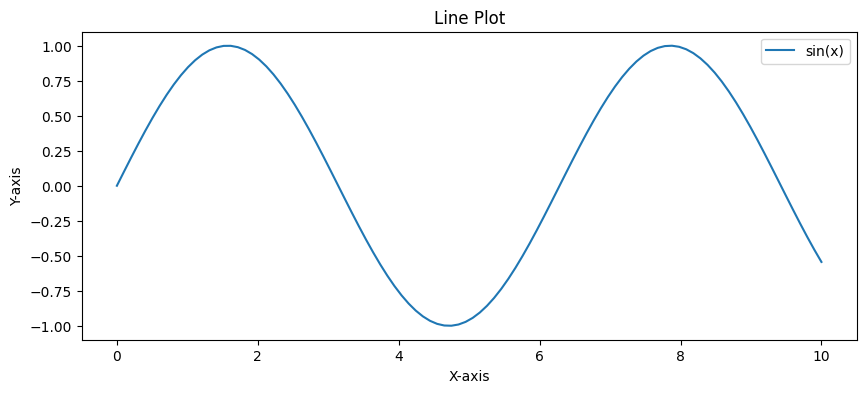

In [10]:
# Line plot
plt.figure(figsize=(10, 4))
plt.plot(x_values, y_values_line, label='sin(x)')
plt.title('Line Plot')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.show()

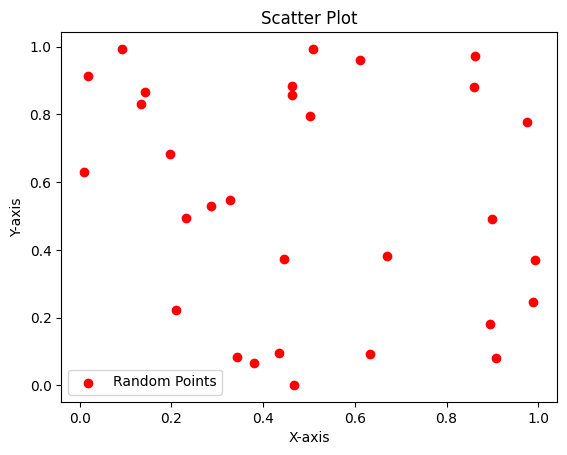

In [11]:
# Scatter plot
plt.scatter(x_values_scatter, y_values_scatter, color='red', marker='o', label='Random Points')
plt.title('Scatter Plot')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.show()

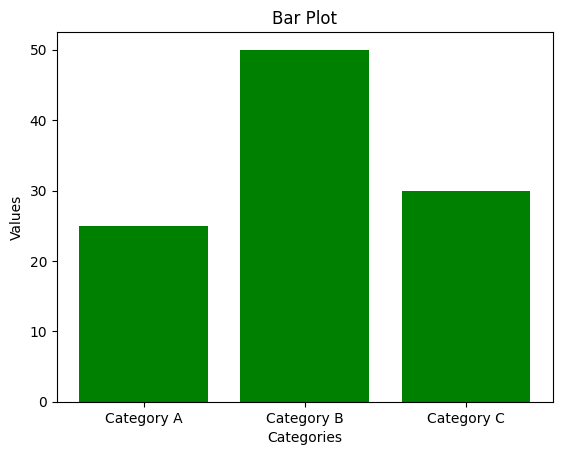

In [12]:
# Bar plot
plt.bar(categories, values_bar, color='green')
plt.title('Bar Plot')
plt.xlabel('Categories')
plt.ylabel('Values')
plt.show()

## Multiple Plots

Create subplots and configure figures to combine different types of plots. Multiple plots help us present various aspects of the data in a single visualisation.

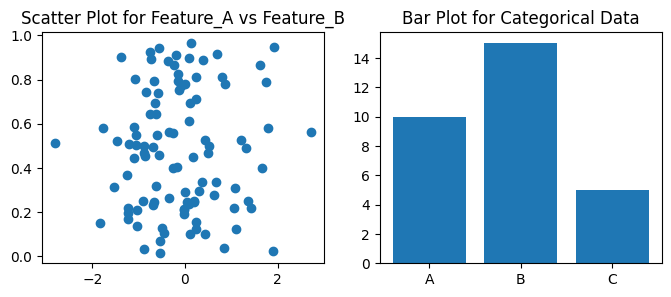

In [17]:
data = pd.DataFrame({
    'Feature_A': np.random.normal(0, 1, 100),
    'Feature_B': np.random.uniform(0, 1, 100)
})

# Subplots
plt.figure(figsize=(8,3))

# Scatter plot
plt.subplot(1,2,1)
plt.scatter(data['Feature_A'], data['Feature_B'])
plt.title('Scatter Plot for Feature_A vs Feature_B')

# Bar plot
data_bar = pd.DataFrame({'Category': ['A', 'B', 'C'], 'Values': [10, 15, 5]})
plt.subplot(1,2,2)
plt.bar(data_bar['Category'], data_bar['Values'])
plt.title('Bar Plot for Categorical Data')

plt.show()

### Alternate Method

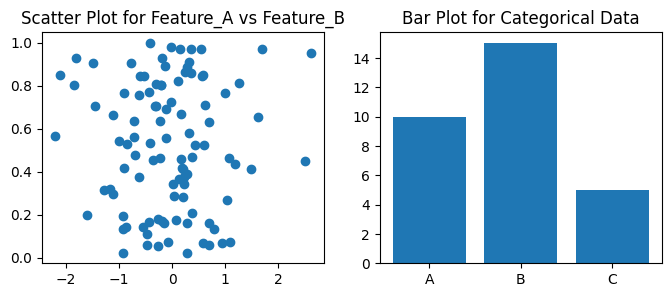

In [18]:
data = pd.DataFrame({
    'Feature_A': np.random.normal(0, 1, 100),
    'Feature_B': np.random.uniform(0, 1, 100)
})

# Subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 3))

# Scatter plot
axes[0].scatter(data['Feature_A'], data['Feature_B'])
axes[0].set_title('Scatter Plot for Feature_A vs Feature_B')

# Bar plot
data_bar = pd.DataFrame({'Category': ['A', 'B', 'C'], 'Values': [10, 15, 5]})
axes[1].bar(data_bar['Category'], data_bar['Values'])
axes[1].set_title('Bar Plot for Categorical Data')

plt.show()

## Advanced Distribution Plot Types

Advanced plot types provide additional insights into the distribution and spread of the data. Explore advanced plot types like histograms, box plots, and violin plots, using matplotlib & seaborn

- Histograms: Good for understanding the overall distribution and frequency of data values.
- Box Plots: Useful for summarizing the central tendency and spread of data, as well as identifying outliers.
- Violin Plots: Provide a combination of box plot and density plot information, offering insights into distribution shape and density.

C:\Users\gb191\AppData\Local\Temp\ipykernel_27428\2073741840.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_box_violin, labels=['Group 1', 'Group 2', 'Group 3'])


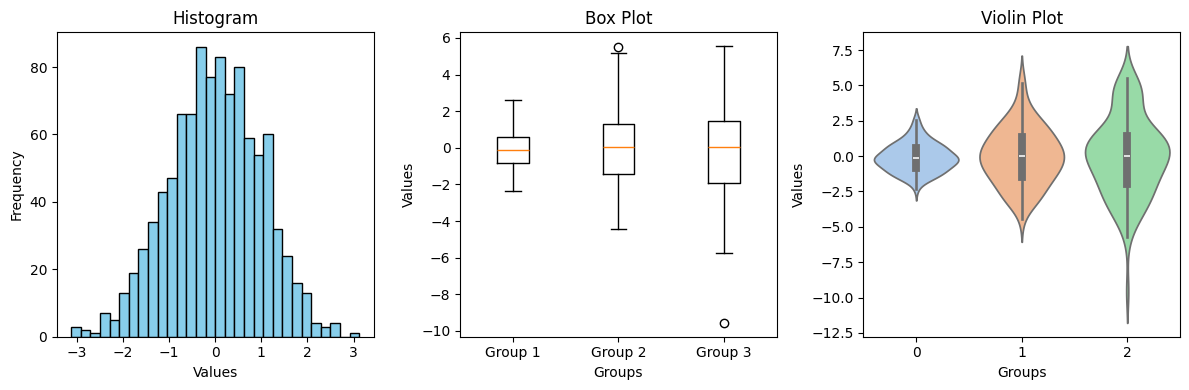

In [19]:
# Sample data
data_histogram = np.random.normal(0, 1, 1000)  # Normally distributed data
data_box_violin = [np.random.normal(0, 1, 100), np.random.normal(0, 2, 100), np.random.normal(0, 3, 100)]

# Histogram
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.hist(data_histogram, bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram')
plt.xlabel('Values')
plt.ylabel('Frequency')

# Box plot
plt.subplot(1, 3, 2)
plt.boxplot(data_box_violin, labels=['Group 1', 'Group 2', 'Group 3'])
plt.title('Box Plot')
plt.xlabel('Groups')
plt.ylabel('Values')

# Violin plot
plt.subplot(1, 3, 3)
sns.violinplot(data=data_box_violin, palette='pastel')
plt.title('Violin Plot')
plt.xlabel('Groups')
plt.ylabel('Values')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


## Three-Dimensional Plots and Colouring
There may be some cases where three-dimensional plots are required. Matplotlib also has the ability to use a colour bar to add greater depth to the plot.

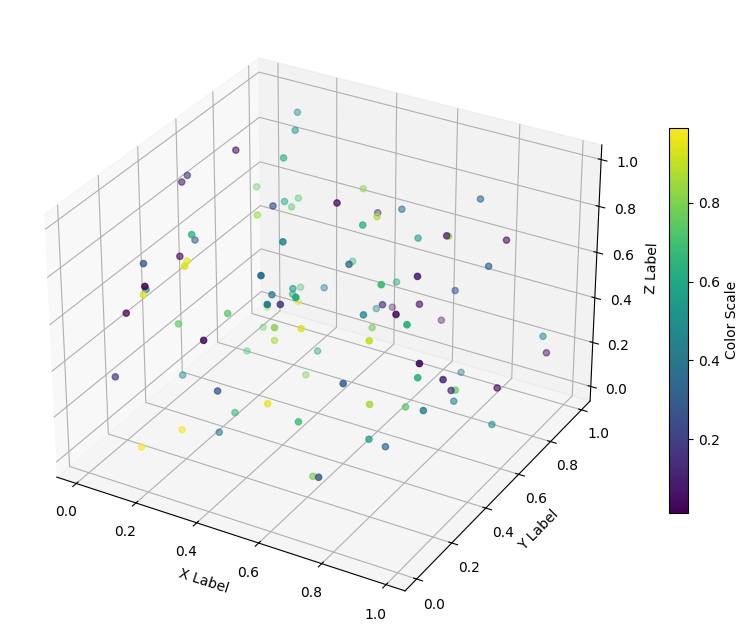

In [20]:
# Generate some example data
np.random.seed(42)
x = np.random.rand(100)
y = np.random.rand(100)
z = np.random.rand(100)
colours = np.random.rand(100)

# Create a 3D scatter plot
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(x, y, z, c=colours, cmap='viridis')

# Add labels
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

# Add a color bar
color_bar = fig.colorbar(scatter, ax=ax, shrink=0.5)
color_bar.set_label('Color Scale')

# Show the plot
plt.show()

## **Matplotlib Cheat Sheet**
![matplotlib-cheat-sheet](../resources/images/week5/matplotlib_cheat_sheet.jpg)


# **Data Visualisation with Seaborn**
[Seaborn](https://seaborn.pydata.org/) is anther Python data visualisation library built on top of Matplotlib. It's primary advantage over Matplotlib lies in its ease of use and aesthetic enhancements. While Matplotlib provides a robust foundation for creating basic plots, Seaborn builds on top of it to offer simpler syntax and visually appealing default styles. This makes Seaborn particularly effective for creating complex visualizations with minimal effort. Seaborn is usually used for its heatmaps and correlation plots.

![seaborn-examples](../resources/images/week5/seaborn_examples.png)

## Heatmaps

<Axes: xlabel='year', ylabel='month'>

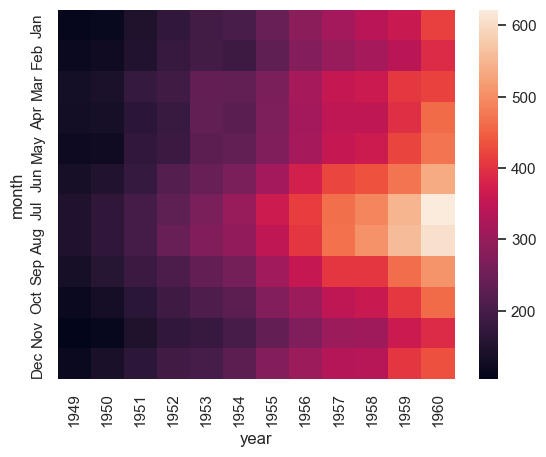

In [12]:
#import seaborn
import seaborn as sns

#load "flights" dataset
data = sns.load_dataset("flights")
data = data.pivot(index="month", columns="year", values="passengers")
sns.heatmap(data)

## Correlation Plots
This is just a heatmap with numbers. We will expand on Correlation further below.

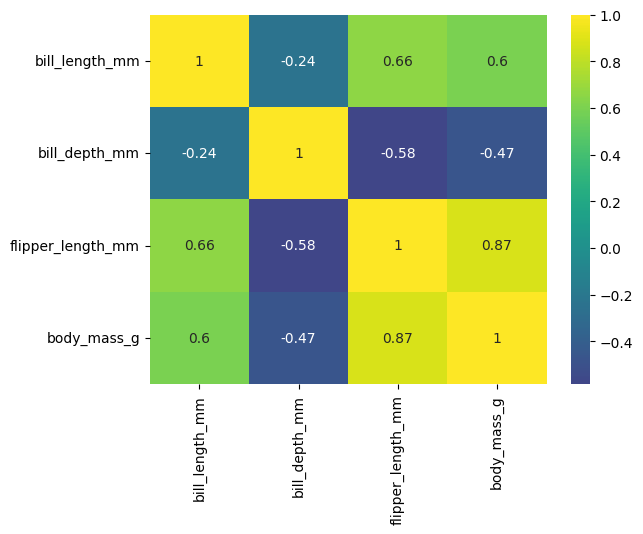

In [17]:
# Load the dataset
df = sns.load_dataset('penguins')
df = df[['bill_length_mm','bill_depth_mm','flipper_length_mm', 'body_mass_g']]

# Calculate the correlation matrix
corr_matrix = df.corr()

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='viridis', center=0)
plt.show()

## Scatterplot Matrix (Also Known as Pairplots)

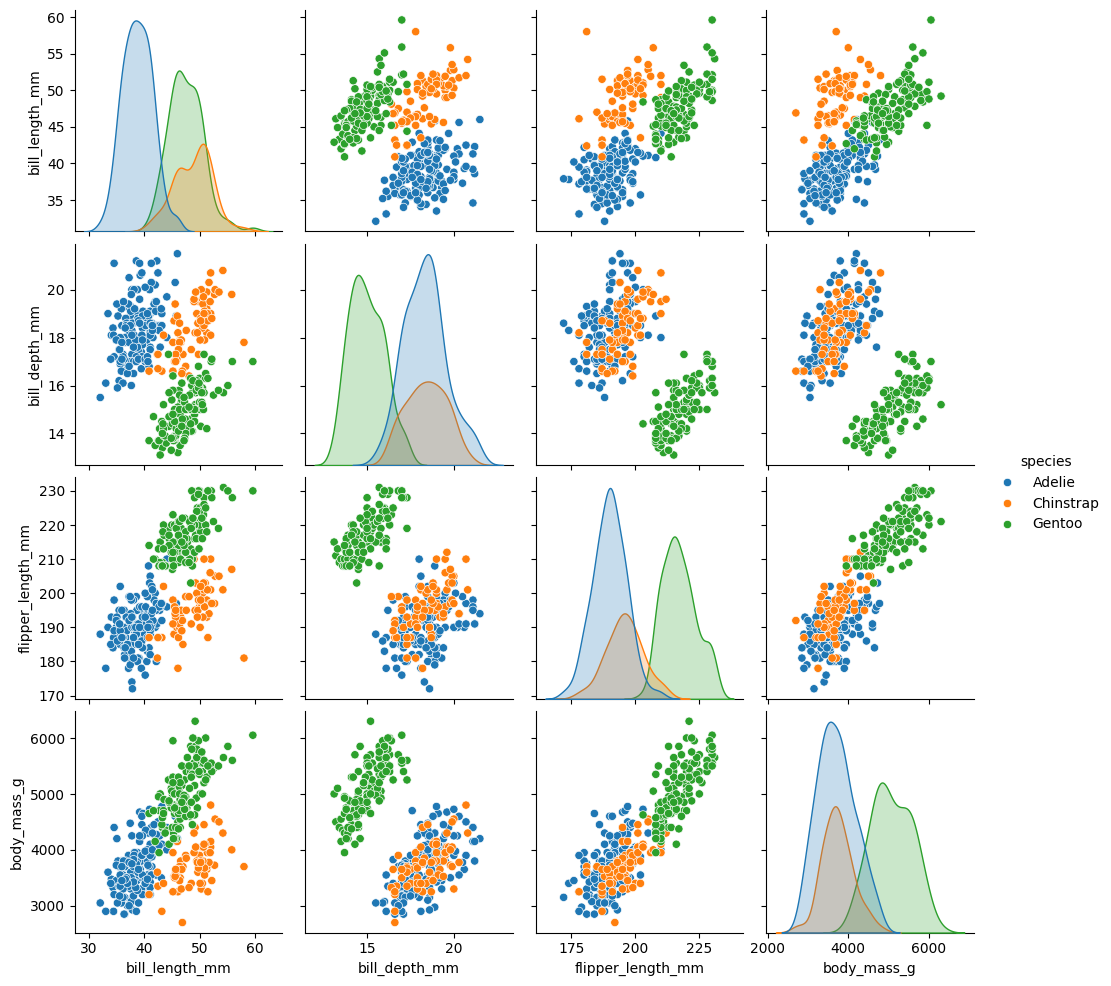

In [16]:
df = sns.load_dataset("penguins")
sns.pairplot(df, hue="species")

## **Seaborn Cheat Sheet**

![seaborn-cheat-sheet](../resources/images/week5/seaborn_cheat_sheet.jpg)

# **Data Visualisation With Plotly**
[Plotly](https://plotly.com/python/) is a powerful Python library for creating interactive and highly customizable visualizations. Unlike traditional plotting libraries like Matplotlib or Seaborn, Plotly allows users to build dynamic charts that can be zoomed, hovered over, and explored directly in web browsers or Jupyter notebooks.

However, Plotly does have some disadvantages. It can be more complex to customize compared to simpler libraries like Seaborn, especially for beginners. The syntax may feel verbose for basic plots, and rendering interactive charts can be slower with large datasets. Additionally, while the core library is free, some advanced features and enterprise tools are part of Plotly’s commercial offerings.


In [22]:
import plotly.express as px
df = px.data.gapminder()
fig = px.scatter(df.query("year==2007"), x="gdpPercap", y="lifeExp", size="pop", color="continent",
           hover_name="country", log_x=True, size_max=60, width=1200, height=600)
fig.show()

## Buttons
Buttons in Plotly are a powerful feature that allow users to interact with visualizations dynamically. They can be used to toggle between different views, filter data, change chart types, or update plot elements without needing to reload or recreate the graph. This makes them especially useful in dashboards or presentations where you want to give users control over what they see. Compared to static plots, buttons enhance user engagement and make data exploration more intuitive and flexible.

In [23]:
import plotly.graph_objects as go

import pandas as pd

# Load dataset
df = pd.read_csv(
    "https://raw.githubusercontent.com/plotly/datasets/master/finance-charts-apple.csv")
df.columns = [col.replace("AAPL.", "") for col in df.columns]

# Initialize figure
fig = go.Figure()

# Add Traces

fig.add_trace(
    go.Scatter(x=list(df.index),
               y=list(df.High),
               name="High",
               line=dict(color="MediumSlateBlue")))

fig.add_trace(
    go.Scatter(x=list(df.index),
               y=[df.High.mean()] * len(df.index),
               name="High Average",
               visible=False,
               line=dict(color="MediumSlateBlue", dash="dash")))

fig.add_trace(
    go.Scatter(x=list(df.index),
               y=list(df.Low),
               name="Low",
               line=dict(color="DarkOrange")))

fig.add_trace(
    go.Scatter(x=list(df.index),
               y=[df.Low.mean()] * len(df.index),
               name="Low Average",
               visible=False,
               line=dict(color="DarkOrange", dash="dash")))

# Add Annotations and Buttons
high_annotations = [dict(x=-0.05,
                         y=df.High.mean(),
                         xanchor="right",
                         yanchor="bottom",
                         xref="x domain",
                         yref="y",
                         text="High Avg:<br> %.2f" % df.High.mean(),
                         showarrow=False),
                    dict(x=df.High.idxmax(),
                         y=df.High.max(),
                         xref="x",
                         yref="y",
                         text="High Max:<br> %.2f" % df.High.max(),
                         ax=0, ay=-40)]
low_annotations = [dict(x=-0.05,
                        y=df.Low.mean(),
                        xanchor="right",
                        yanchor="top",
                        xref="x domain",
                        yref="y",
                        text="Low Avg:<br> %.2f" % df.Low.mean(),
                        showarrow=False),
                   dict(x=df.Low.idxmin(),
                        y=df.Low.min(),
                        xref="x",
                        yref="y",
                        text="Low Min:<br> %.2f" % df.Low.min(),
                        ax=0, ay=40)]

fig.update_layout(
    updatemenus=[
        dict(
            type="buttons",
            direction="right",
            active=0,
            x=0.57,
            y=1.2,
            buttons=list([
                dict(label="None",
                     method="update",
                     args=[{"visible": [True, False, True, False]},
                           {"title": "Yahoo",
                            "annotations": []}]),
                dict(label="High",
                     method="update",
                     args=[{"visible": [True, True, False, False]},
                           {"title": "Yahoo High",
                            "annotations": high_annotations}]),
                dict(label="Low",
                     method="update",
                     args=[{"visible": [False, False, True, True]},
                           {"title": "Yahoo Low",
                            "annotations": low_annotations}]),
                dict(label="Both",
                     method="update",
                     args=[{"visible": [True, True, True, True]},
                           {"title": "Yahoo",
                            "annotations": high_annotations + low_annotations}]),
            ]),
        )
    ])

# Set title
fig.update_layout(
    title_text="Yahoo",
    xaxis_domain=[0.05, 1.0]
)

fig.show()

fig.write_html("../resources/images/week5/finance_chart.html")

# **Exploratory Data Analysis (EDA)**

Exploratory Data Analysis (EDA) is the process of examining and understanding a dataset before applying formal modeling or statistical techniques. It involves summarizing the main characteristics of the data—often using visual methods like histograms, scatter plots, and box plots—to uncover patterns, detect anomalies, test assumptions, and check for missing values. EDA helps you ask the right questions, choose appropriate tools, and prepare your data for deeper analysis. In short, it's a critical first step in any data science or analytics project that ensures you're working with clean, meaningful, and well-understood data.

## Descriptive Statistics

In this section, we'll cover basic descriptive statistics, including mean, median, mode, and measures of dispersion. Descriptive statistics help us summarise and understand the main make up of a dataset.


Mean: 4.63
Median: 4.0
Mode: 8
Min: 0
Max: 9


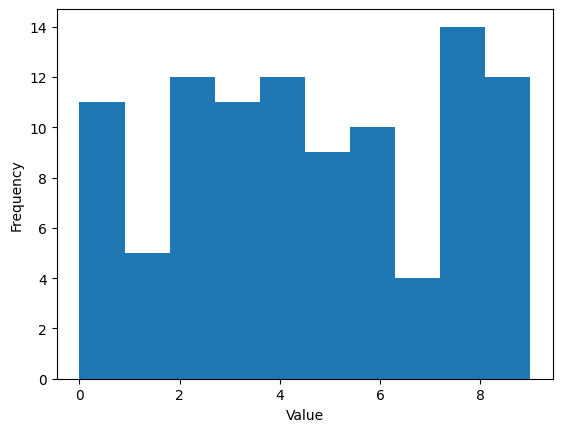

In [24]:
# Create a DataFrame for Step 1 - Descriptive Statistics
rand_vals = np.random.randint(0,10,100)
data_descriptive = pd.DataFrame({'Values': rand_vals})


# Calculating mean, median, mode
mean_value = data_descriptive['Values'].mean()
median_value = data_descriptive['Values'].median()
mode_value = data_descriptive['Values'].mode().iloc[0] 
min_value = data_descriptive["Values"].min()
max_value = data_descriptive["Values"].max()

#Note: if there are multiple values for mode, a dataframe of results would be returned unless .iloc[0] included

print(f"Mean: {mean_value}\nMedian: {median_value}\nMode: {mode_value}\nMin: {min_value}\nMax: {max_value}")

plt.hist(rand_vals)
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()


## Understanding Data Distributions

Understanding data distributions is crucial for gaining insights into the central tendencies and shapes of datasets. Let's explore descriptive statistics like mean, median, skewness, and kurtosis. 

Two key statistical techniques used to determine the shape of a frequency distribution are Sknewness and Kurtosis. A frequency distribution represents the number of occurrences of each value within a dataset. 
- Skewness measures the asymmetry of a distribution. It indicates whether the data is skewed to the left (negatively skewed) or to the right (positively skewed).
  - Symmetric (Skew ~= 0): The distribution looks the same to the left and right of the center point. In this case, the mean, median, and mode are equal, and there is no skewness.
  - Positive Skewness (Skew > 0): The right tail is longer than the left tail, indicating that the concentration of values is more towards lower values. Here, the mean is greater than the median. 
  - Negative Skewness (Skew < 0): The left tail is longer than the right tail, indicating that the concentration of values is more towards higher values. Here, the mean is less than the median. <br><br>
- Kurtosis measures the tailedness or sharpness of a distribution. It indicates whether the data has heavy or light tails compared to a normal distribution.
  - Leptokurtic (Kurtosis > 3): Has a higher peak than the normal distribution, indicating a high concentration of data points near the mean and heavier tails.
  - Mesokurtic (Kurtosis = 3): Has a peak similar to the normal distribution, indicating a moderate concentration of data points around the mean.
  - Platykurtic (Kurtosis < 3): Has a lower peak than the normal distribution, indicating a lower concentration of data points around the mean and lighter tails.

[Difference Between Sknewness and Kurtosis](https://www.geeksforgeeks.org/difference-between-skewness-and-kurtosis/)

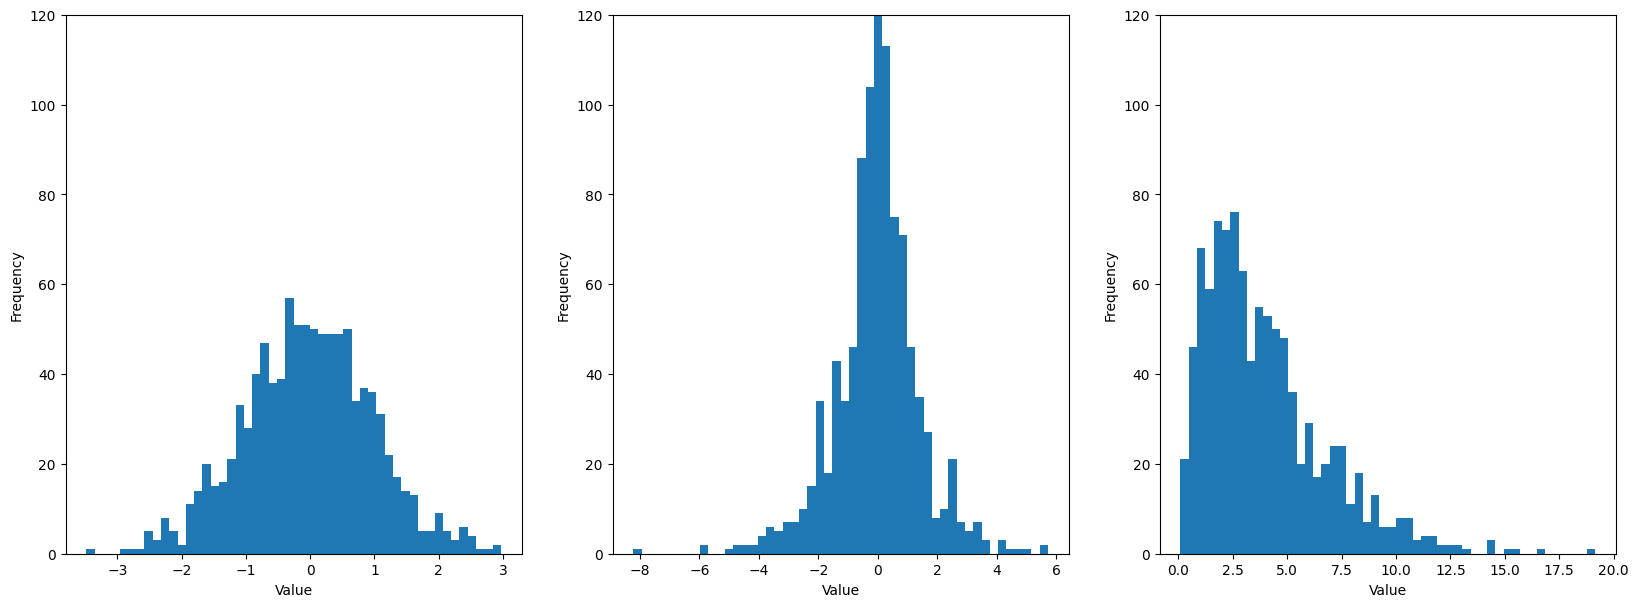

In [25]:
# Sample data for EDA
data_eda = pd.DataFrame({
    'Feature_A': np.random.normal(0, 1, 1000),
    'Feature_B': np.random.laplace(0, 1, 1000),
    'Feature_C': np.random.gamma(2 ,2, 1000)
})


plt.figure(figsize=(20,7))

plt.subplot(1,3,1)
plt.hist(data_eda["Feature_A"], bins=50)
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.ylim([0,120])


plt.subplot(1,3,2)
plt.hist(data_eda["Feature_B"], bins=50)
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.ylim([0,120])

plt.subplot(1,3,3)
plt.hist(data_eda["Feature_C"], bins=50)
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.ylim([0,120])

plt.show()

We can set density = True for our histogram plot. This means we are computing the probability of a specific value being part of that bin. It is also important when you are comparing different distribution plots that you consider the scale of the y-axis. It is also really important to ensure you use the same number of bins for each distribution, because this greatly changes how the plots look.

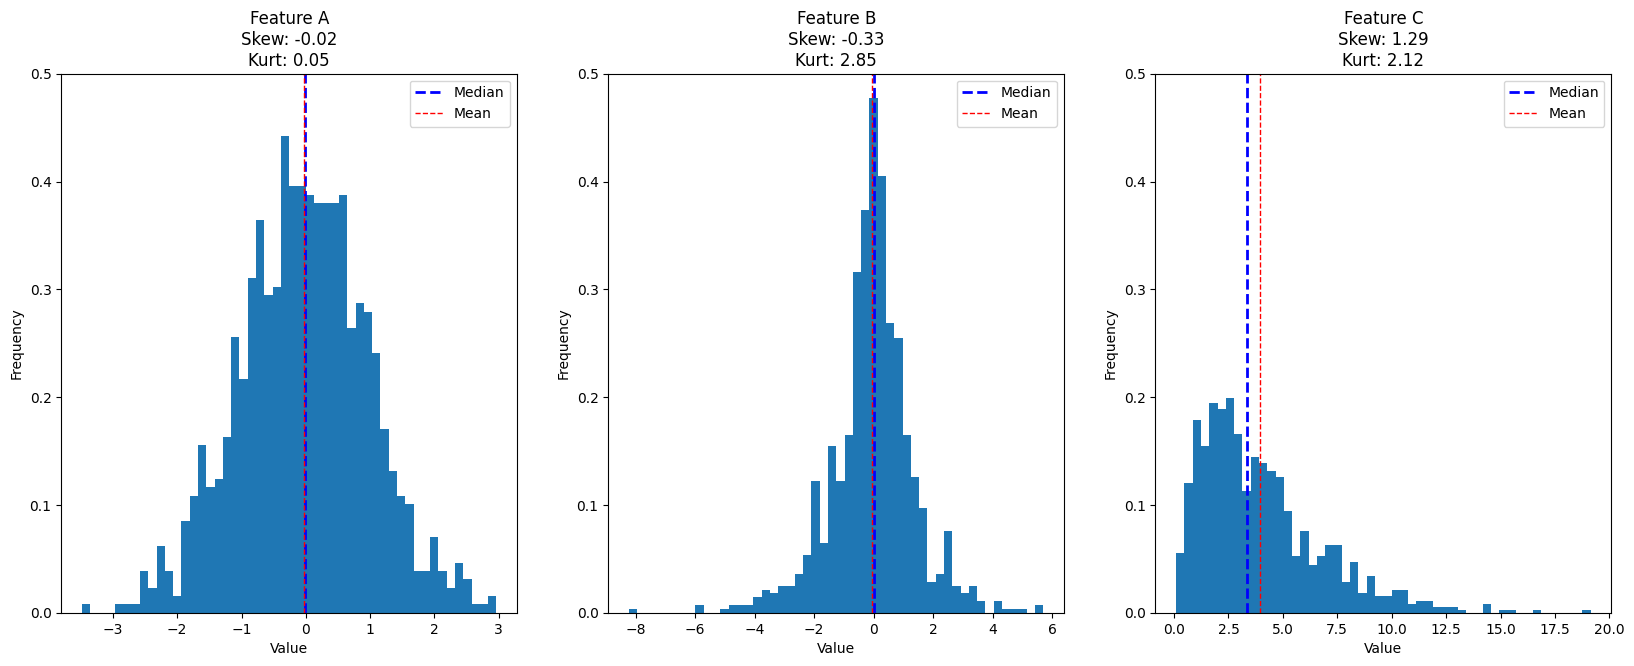

In [26]:
# Descriptive statistics for each feature column
mean_A   = data_eda["Feature_A"].mean()
median_A = data_eda["Feature_A"].median()
skew_A   = data_eda["Feature_A"].skew()
kurt_A   = data_eda["Feature_A"].kurt()

mean_B   = data_eda["Feature_B"].mean()
median_B = data_eda["Feature_B"].median()
skew_B   = data_eda["Feature_B"].skew()
kurt_B   = data_eda["Feature_B"].kurt()

mean_C   = data_eda["Feature_C"].mean()
median_C = data_eda["Feature_C"].median()
skew_C   = data_eda["Feature_C"].skew()
kurt_C   = data_eda["Feature_C"].kurt()

#Round for plotting
skew_A = np.round(skew_A,2)
kurt_A = np.round(kurt_A,2)
skew_B = np.round(skew_B,2)
kurt_B = np.round(kurt_B,2)
skew_C = np.round(skew_C,2)
kurt_C = np.round(kurt_C,2)

# Descriptive statistics for feature C column
plt.figure(figsize=(20,7))

plt.subplot(1,3,1)
plt.hist(data_eda["Feature_A"], bins=50, density=True)
plt.axvline(median_A, color='blue', linestyle='dashed', linewidth=2, label='Median')
plt.axvline(mean_A, color='red', linestyle='dashed', linewidth=1, label='Mean')
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title(f"Feature A\nSkew: {skew_A}\nKurt: {kurt_A}")
plt.ylim([0,0.5])
plt.legend()

plt.subplot(1,3,2)
plt.hist(data_eda["Feature_B"], bins=50, density=True)
plt.axvline(median_B, color='blue', linestyle='dashed', linewidth=2, label='Median')
plt.axvline(mean_B, color='red', linestyle='dashed', linewidth=1, label='Mean')
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title(f"Feature B\nSkew: {skew_B}\nKurt: {kurt_B}")
plt.ylim([0,0.5])
plt.legend()

plt.subplot(1,3,3)
plt.hist(data_eda["Feature_C"], bins=50, density=True)
plt.axvline(median_C, color='blue', linestyle='dashed', linewidth=2, label='Median')
plt.axvline(mean_C, color='red', linestyle='dashed', linewidth=1, label='Mean')
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title(f"Feature C\nSkew: {skew_C}\nKurt: {kurt_C}")
plt.ylim([0,0.5])
plt.legend()

plt.show()


## Outlier Detection

Outlier detection is essential for understanding anomalies that may impact statistical analyses. Identify and handle outliers using visualisation techniques. 

In [117]:
# Create a dataset with outliers

# Set a random seed for reproducibility
np.random.seed(42)
# Generate a dataset with a normal distribution
normal_data = np.random.normal(loc=50, scale=10, size=100)
# Add outliers
outliers = np.array([20, 80, 90, 110])
# Combine the normal data with outliers
data_with_outliers = np.concatenate([normal_data, outliers])

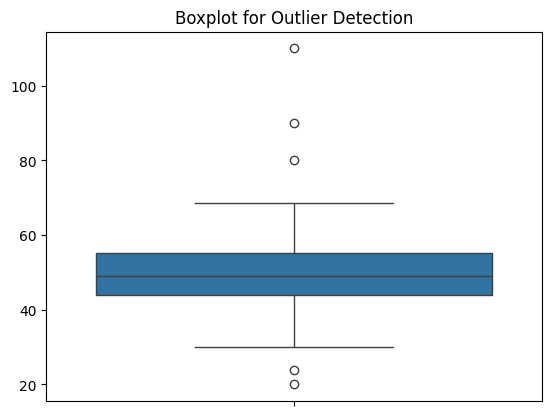

In [118]:
# Box plot for outlier detection
sns.boxplot(data=data_with_outliers)
plt.title('Boxplot for Outlier Detection')
plt.show()


### Data Distribution Exploration

Exploring data distributions helps us understand the shape and patterns within the data. Perform univariate and bivariate analysis using histograms, kernel density plots, scatter plots, and pair plots. 

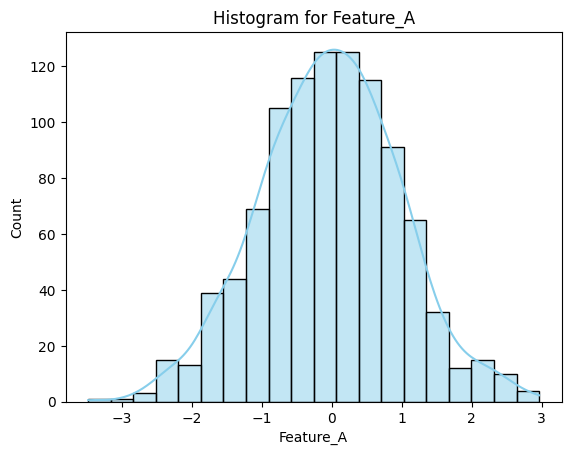

In [27]:
# Univariate analysis: Histogram
sns.histplot(data_eda['Feature_A'], kde=True, color='skyblue', bins=20)
plt.title('Histogram for Feature_A')
plt.show()


# **Statistical Analysis**
Statistical analysis is the process of collecting, organizing, and interpreting data to uncover patterns, relationships, and trends. By applying mathematical techniques, it transforms raw data into meaningful insights that support informed and evidence-based decision-making—especially in the content of our business.

In this lesson we’ll briefly explore correlation, a key concept in statistical analysis that helps us understand how variables relate to one another. In next week’s content, we’ll dive deeper into other important techniques such as regression, hypothesis testing, and confidence intervals. Stay tuned!
## **Correlation Tests**

Correlation analysis helps us understand the strength (indicated by the magnitude of the coefficient) as well as the direction (indicated by the sign of the coefficient) of the relationship between two variables. 

![correlation](../resources/images/week5/correlation.jpg)

The Pearson Correlation and Spearman Correlation are amongst the most popular methods to calculate correlation. We will explore these two methods using the scipy stats library in Python. There are some key differences between these two methods:

### Pearson Correlation
Also known as linear correlation, measures the linear relationship between two continuous variables. 
$$
r = \frac{\sum_{}\left(x_{i} - \bar{x}\right)\left(y_{i} - \bar{y}\right)}{\sqrt{\sum_{}\left(x_{i} - \bar{x}\right)^{2}\sum_{}\left(y_{i} - \bar{y}\right)^{2}}} \\
\\
Where: \\
x_{i} = x \: samples \\
y_{i} = y \: samples \\
\bar{x} = mean \:  of \: x \\
\bar{y} = mean \: of \: y \\
$$

Before calculating the Pearson's coefficient, the data needs to meet several assumptions:
1. Data sample is random and representative of the whole population
2. Variables are quantitative - continuous
3. Data is paired - each x value is associated with a y value
4. Observations are independent
5. Data is normally distributed
6. Minimal outliers in the data

### Spearman Correlation
Spearman Correlation measures a monotonic relationship between two variables based on the rank of the data. A monotonic relationship means the size of one variable increases whilst the other variable also increases, or when the size of one variable increases whilst the other decreases. It is a relationship between two variables such that when there is a change in one variable in a given direction, the other always changes in the same direction (either in the direction of the first variable, or in the opposite direction). 

$$
r_{s} = 1- \frac{6\sum_{}d^{2}}{n\left(n^{2} - 1\right)} \\
\\
Where: \\
n = number \: of \: obervations \\
d = difference \: between \: ranks \\
$$

The rank is simply the position of the data point in descending order. E.g. for the data points [10, 5, 21, 3] the rank is [2, 3, 1, 4]

Before calculating the Spearman's coefficient, the data needs to meet several assumptions:
1. Data sample is random and representative of the whole population
2. Data is paired - each x value is associated with a y value
3. Observations are independent
5. Variables are ordinal or continuous
6. The data does not need to be normally distributed



Both coefficients range from -1 to 1, indicating the strength and direction of the relationship.

Understanding these correlation coefficients is essential for choosing the appropriate method based on the nature of your data and the relationship you are investigating.

## Correlation Analysis
Explore Pearson correlation and visualize correlations using seaborn heatmaps. We will explore correlation and heatmaps in more detail during later weeks.

In [29]:
# Sample data
data_corr_x = pd.Series([1, 2, 3, 4, 5])
data_corr_y = pd.Series([2, 3, 4, 5, 6])

# Pearson correlation
pearson_corr, _ = stats.pearsonr(data_corr_x, data_corr_y)

# Spearman rank correlation
spearman_corr, _ = stats.spearmanr(data_corr_x, data_corr_y)

print(f"Pearson Correlation: {pearson_corr}, Spearman Correlation: {spearman_corr}")

Pearson Correlation: 1.0, Spearman Correlation: 0.9999999999999999


In [30]:
def subplot_corr(x: np.ndarray, y: np.ndarray, data_shape: str, subplot_rows: int, subplot_cols: int, subplot_pos: int):
    """
    Create a subplot with a scatterplot of two arrays against each other. 
    Also calculates the pearson and spearman coefficients and displays them on the plot
    
    Params:
    x: first array
    y: second array
    data_shape: string used in title to explain what shape y follows
    subplot_rows: number of rows in subplot
    subplot_cols: number of columns in subplot
    subplot_pos: position of current plot
    """
    pearson_corr, _ = stats.pearsonr(x, y)
    pearson_corr = np.round(pearson_corr,2)
    spearman_corr, _ = stats.spearmanr(x, y)
    spearman_corr = np.round(spearman_corr,2)

    plt.subplot(subplot_rows, subplot_cols, subplot_pos)
    plt.scatter(x,y)
    plt.title(f"{data_shape} Data\nPearson Correlation: {pearson_corr}\nSpearman Correlation: {spearman_corr}")


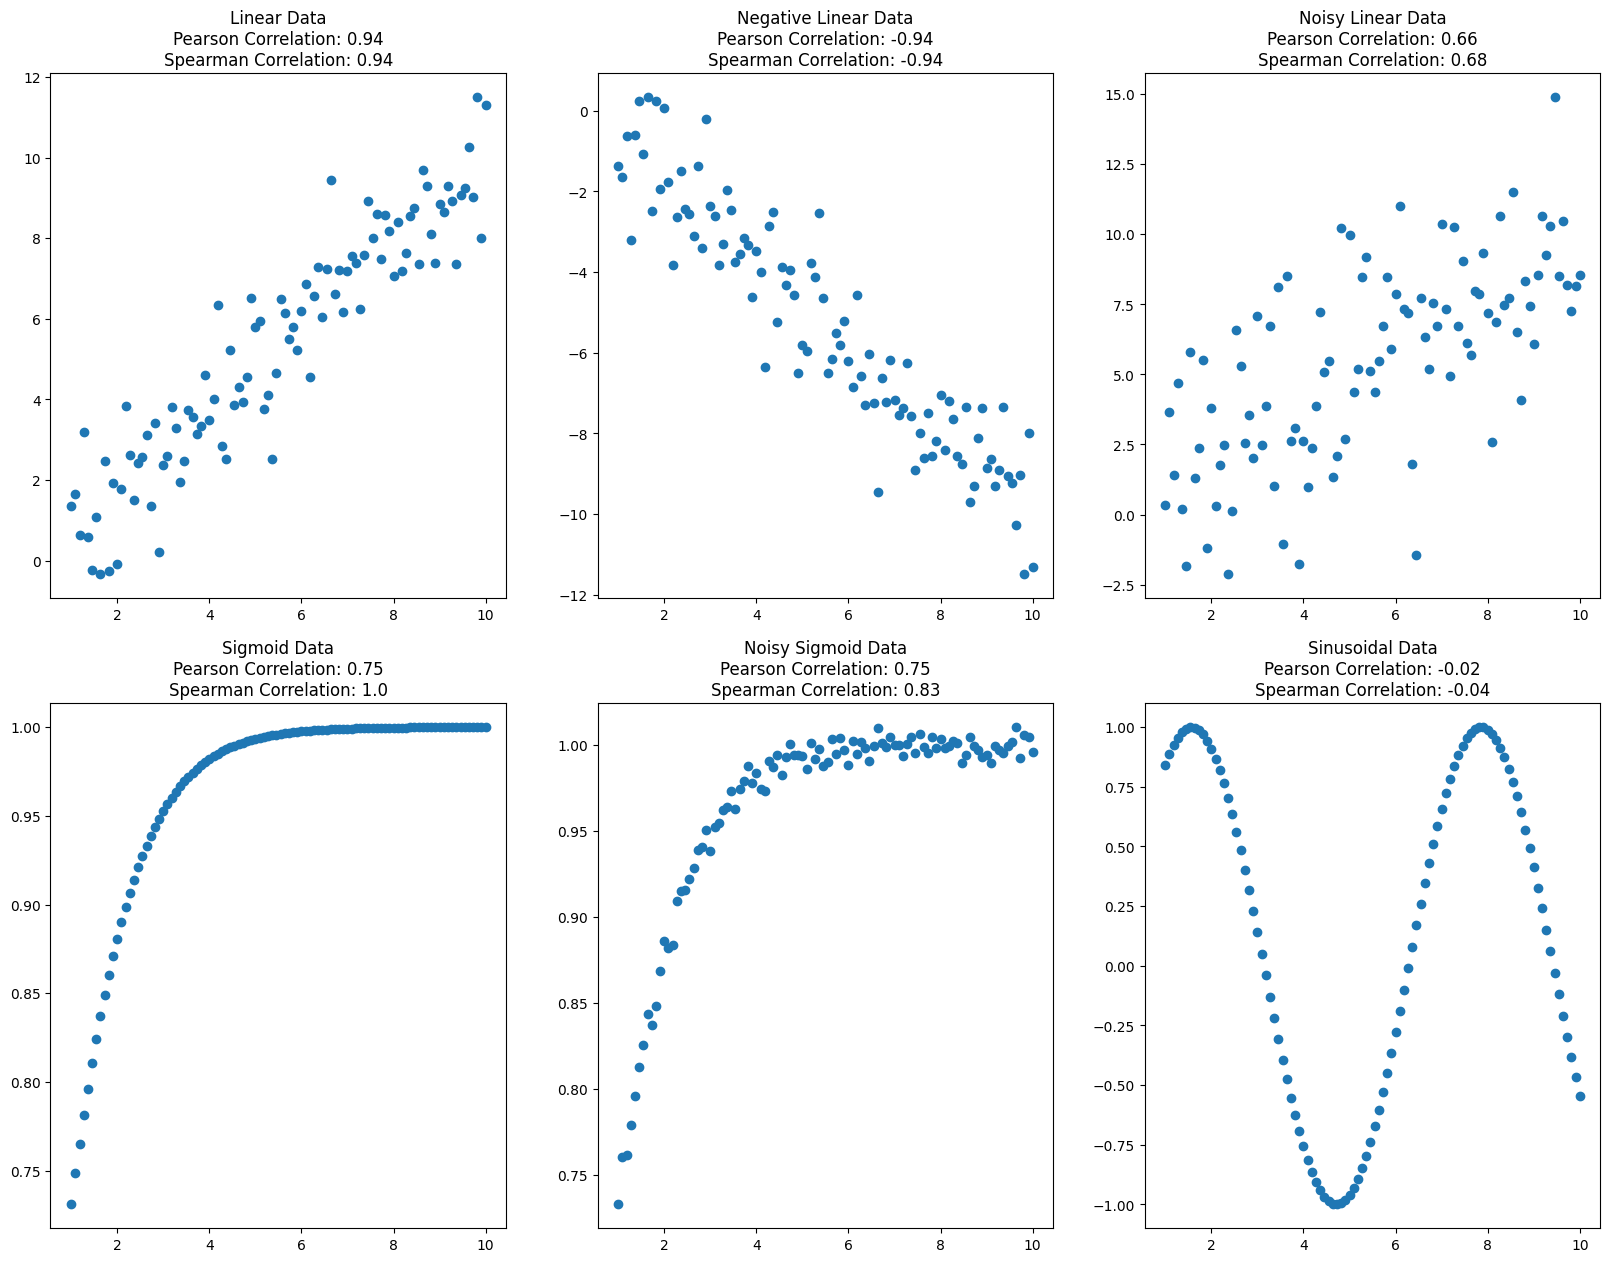

In [31]:
linear_x = np.linspace(1,10,100)
linear_y = linear_x + np.random.normal(0,1,100)
linear_y_negative = -linear_y
linear_y_noisy = linear_x + np.random.normal(0,3,100)
sigmoid_y = 1/ (1+np.exp(-linear_x))
sigmoid_y_noisy = 1/ (1+np.exp(-linear_x)) + + np.random.normal(0,0.005,100)
parabolic_y = np.sin(linear_x)

y_dict = {
    "Linear"          : linear_y, 
    "Negative Linear" : linear_y_negative, 
    "Noisy Linear"    : linear_y_noisy, 
    "Sigmoid"         : sigmoid_y, 
    "Noisy Sigmoid"   : sigmoid_y_noisy, 
    "Sinusoidal"      : parabolic_y
}

y_df = pd.DataFrame(y_dict)

plt.figure(figsize=(20,15))

i = 1
for col in y_df:
    subplot_corr(linear_x, y_df[col], col, 2, 3 ,i)
    i+=1
plt.show()
    

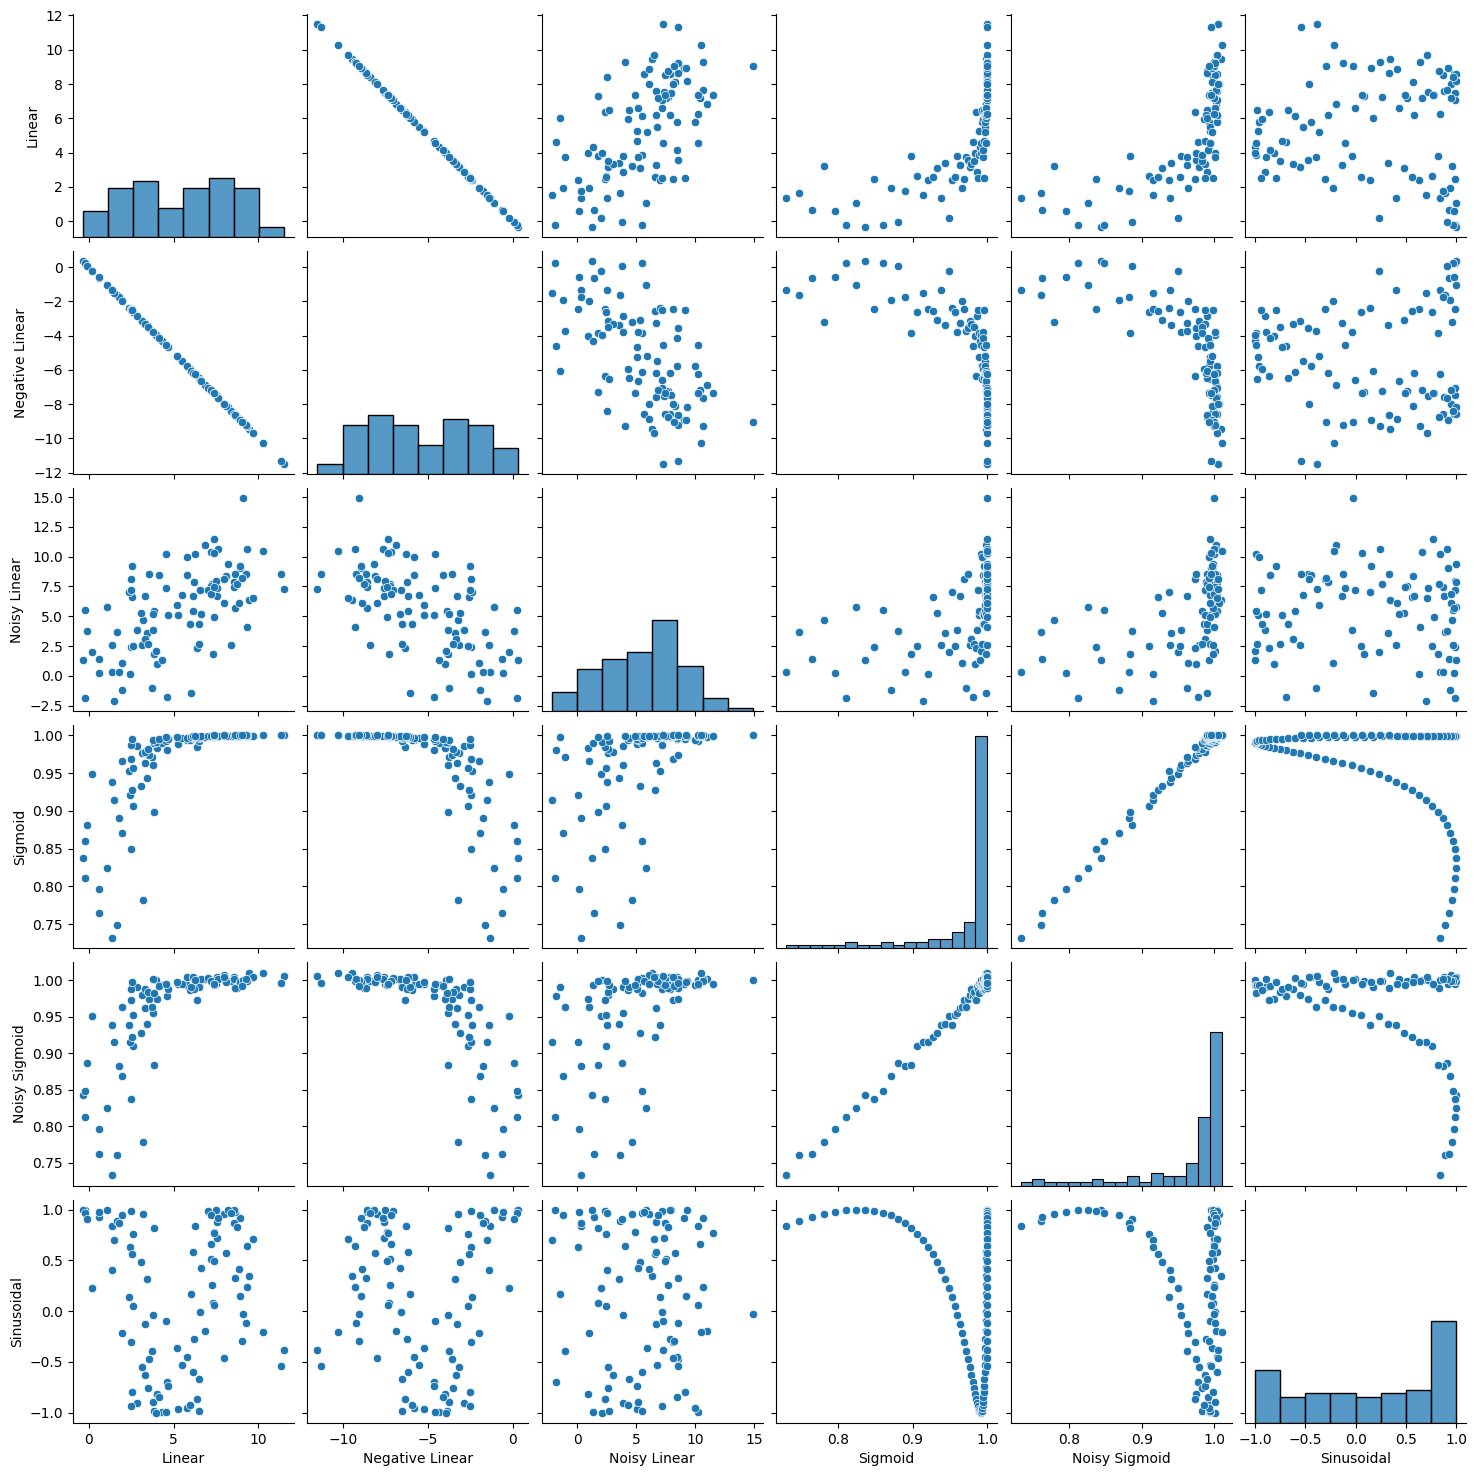

In [32]:
# Bivariate analysis: Pair plot
sns.pairplot(y_df)
plt.show()

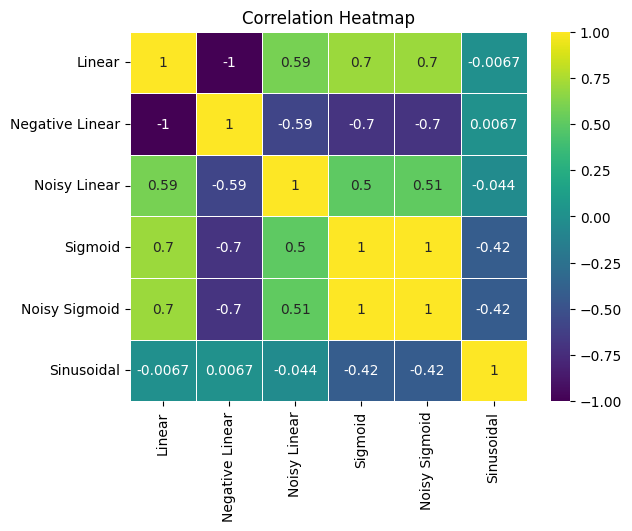

In [33]:
# Correlation matrix
corr_matrix = y_df.corr()

# Heatmap
sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap="viridis")
plt.title('Correlation Heatmap')
plt.show()


# **Pandas Profiling**

pandas-profiling is a powerful library for generating profile reports from a Pandas DataFrame. It provides an overview of the dataset, including descriptive statistics, correlations, missing values, and more. It has recently had a change of library name to **ydata_profiling**

In [136]:
# Create a 100 row dataset made up of 4 numerical columns & 2 string columns

# Set a random seed for reproducibility
np.random.seed(42)
# Generate numerical columns
num_columns = {
    'Numeric1': np.random.randint(1, 100, size=100),
    'Numeric2': np.random.uniform(0, 1, size=100),
    'Numeric3': np.random.normal(50, 10, size=100),
    'Numeric4': np.random.choice([0, 1], size=100),
}
# Generate string columns
str_columns = {
    'String1': np.random.choice(['A', 'B', 'C', 'D'], size=100),
    'String2': np.random.choice(['X', 'Y', 'Z'], size=100),
}
# Create a DataFrame
df = pd.DataFrame({**num_columns, **str_columns})

# Display the first few rows of the dataset
df.head()

,Numeric1,Numeric2,Numeric3,Numeric4,String1,String2
0,52,0.280935,40.094637,1,C,Z
1,93,0.542696,44.337023,0,B,Y
2,15,0.140924,50.996514,0,B,X
3,72,0.802197,44.965243,1,B,X
4,61,0.074551,34.493366,0,A,Z


In [137]:
profile = ProfileReport(df, title="Profiling Report")
profile.to_notebook_iframe()

Render HTML: 100%|██████████| 1/1 [00:00<00:00,  1.28it/s]


# **Spatial plotting**

In [2]:
pip install geopandas folium

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.org/simple, http://sbnswas258.services.local/simple/
   ---------------------------------------- 0.0/338.4 kB ? eta -:--:--
   ------------------------------- -------- 266.2/338.4 kB 8.3 MB/s eta 0:00:01
   ---------------------------------------- 338.4/338.4 kB 5.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/19.2 MB ? eta -:--:--
    --------------------------------------- 0.3/19.2 MB 10.2 MB/s eta 0:00:02
   -- ------------------------------------- 1.0/19.2 MB 13.1 MB/s eta 0:00:02
   --- ------------------------------------ 1.8/19.2 MB 14.7 MB/s eta 0:00:02
   ----- ---------------------------------- 2.7/19.2 MB 14.2 MB/s eta 0:00:02
   ------- -------------------------------- 3.7/19.2 MB 15.7 MB/s eta 0:00:01
   --------- ------------------------------ 4.7/19.2 MB 16.5 MB/s eta 0:00:01
   ------------ --------------------------- 5.9/19.2 MB 18.0 MB/s e


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [34]:
import geopandas as gpd
import folium

In [35]:
pwd

'c:\\LocalData\\gb191\\intro-to-python\\week5'

In [36]:
# Create a geodataframe from a local geodatabase 
gdf = gpd.read_file("data.gdb")
gdf

,LGA_NAME,GAZETTED_DATE,PDA_NAME,AREA_HA,PDA_STATUS,EDQ_TYPE,REGULATION_CODE,SHAPE_LENG,SHAPE_Length,SHAPE_Area,geometry
0,Central Highlands,2010-07-30 00:00:00+00:00,Blackwater,656.904704,Declared,UDA,8,0.119331,0.119331,5.789632e-04,"MULTIPOLYGON (((148.8855 -23.56273, 148.8855 -..."
1,Moreton Bay,2016-09-02 00:00:00+00:00,The Mill at Moreton Bay,466.654910,Declared,PDA,10,0.104799,0.104799,4.256037e-04,"MULTIPOLYGON (((153.00192 -27.25602, 153.00173..."
2,Brisbane,2019-12-13 00:00:00+00:00,Roma Street Cross River Rail,32.077985,Declared,PDA,16,NaN,0.042312,2.931048e-05,"MULTIPOLYGON (((153.01846 -27.46455, 153.01848..."
3,Brisbane,2020-09-02 00:00:00+00:00,Boggo Road Cross River Rail,38.758439,Declared,PDA,18,NaN,0.030880,3.542488e-05,"MULTIPOLYGON (((153.02958 -27.49299, 153.02995..."
4,Gold Coast,2013-10-04 00:00:00+00:00,Southport,251.614934,Declared,PDA,6,NaN,0.083428,1.820525e-04,"MULTIPOLYGON (((153.41472 -27.97718, 153.41471..."
5,Sunshine Coast,2010-10-28 00:00:00+00:00,Caloundra South,2367.653670,Declared,UDA,14,NaN,0.256378,2.151302e-03,"MULTIPOLYGON (((153.10311 -26.80327, 153.09517..."
6,Sunshine Coast Regional,2023-07-28 00:00:00+00:00,Sunshine Coast Airport,454.261371,Declared,PDA,20,NaN,0.116568,4.119291e-04,"MULTIPOLYGON (((153.07885 -26.57785, 153.08066..."
7,Brisbane,2023-09-22 00:00:00+00:00,Woolloongabba,106.208138,Declared,PDA,21,0.086269,0.086365,9.705879e-05,"MULTIPOLYGON (((153.02279 -27.4825, 153.0228 -..."
8,Gold Coast,2013-02-01 00:00:00+00:00,Parklands,29.900810,Declared,PDA,1,0.025029,0.025029,2.744218e-05,"MULTIPOLYGON (((153.38699 -27.95798, 153.38824..."
9,Brisbane,2008-03-28 00:00:00+00:00,Bowen Hills,107.582070,Declared,UDA,2,0.064970,0.064970,9.828467e-05,"MULTIPOLYGON (((153.04039 -27.43376, 153.04051..."


In [37]:
# List all the methods of the geometry object in geopandas
dir(gdf.geometry[0])

['__and__',
 '__bool__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__geo_interface__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__xor__',
 '_geom',
 '_geom_prepared',
 '_ndim',
 '_repr_svg_',
 'area',
 'boundary',
 'bounds',
 'buffer',
 'centroid',
 'contains',
 'contains_properly',
 'convex_hull',
 'coords',
 'covered_by',
 'covers',
 'crosses',
 'difference',
 'disjoint',
 'distance',
 'dwithin',
 'envelope',
 'equals',
 'equals_exact',
 'geom_type',
 'geometryType',
 'geoms',
 'has_m',
 'has_z',
 'hausdorff_distance',
 'interpolate',
 'intersection',
 'intersects',
 'is_closed',
 'is_empty',
 'is_ring',
 'is_simple',
 'is_valid',
 'length',

In [38]:
# Inspect brisbane subset
brisbane_PDAs = (gdf[gdf["LGA_NAME"] == "Brisbane"])[['LGA_NAME','PDA_NAME', 'PDA_STATUS', 'REGULATION_CODE', 'geometry']]
brisbane_PDAs

,LGA_NAME,PDA_NAME,PDA_STATUS,REGULATION_CODE,geometry
2,Brisbane,Roma Street Cross River Rail,Declared,16,"MULTIPOLYGON (((153.01846 -27.46455, 153.01848..."
3,Brisbane,Boggo Road Cross River Rail,Declared,18,"MULTIPOLYGON (((153.02958 -27.49299, 153.02995..."
7,Brisbane,Woolloongabba,Declared,21,"MULTIPOLYGON (((153.02279 -27.4825, 153.0228 -..."
9,Brisbane,Bowen Hills,Declared,2,"MULTIPOLYGON (((153.04039 -27.43376, 153.04051..."
12,Brisbane,Oxley,Declared,13,"MULTIPOLYGON (((152.96685 -27.55047, 152.9669 ..."
14,Brisbane,Herston Quarter,Declared,11,"MULTIPOLYGON (((153.02508 -27.44697, 153.0249 ..."
18,Brisbane,Yeronga,Declared,14,"MULTIPOLYGON (((153.02009 -27.51558, 153.02032..."
22,Brisbane,Northshore Hamilton,Declared,1,"MULTIPOLYGON (((153.08386 -27.43445, 153.08451..."
23,Brisbane,Albert Street Cross River Rail,Declared,15,"MULTIPOLYGON (((153.02764 -27.47168, 153.02749..."
26,Brisbane,Queen's Wharf Brisbane,Declared,8,"MULTIPOLYGON (((153.02371 -27.47098, 153.02401..."


In [39]:
centroids_x = []
centroids_y = []
for _, row in brisbane_PDAs.iterrows():
    centroids_x.append(row.geometry.centroid.x)
    centroids_y.append(row.geometry.centroid.y)

global_centroid_x = sum(centroids_x)/len(centroids_x)
global_centroid_y = sum(centroids_y)/len(centroids_y)


In [40]:
global_centroid_x, global_centroid_y # y is latitude and x is longitude

(153.0274899842586, -27.466948148389495)

In [41]:
# Initialise folium map object
brisbane_pda_map = folium.Map(location=[global_centroid_y, global_centroid_x], zoom_start=12)  # Set the initial map location and zoom
brisbane_pda_map

In [42]:
folium.GeoJson(brisbane_PDAs).add_to(brisbane_pda_map)
brisbane_pda_map

# **Examples of Other Visualisations**
In this section, we will share some other visulisation techniques, which have been used in EQL projects. This is just to give you an idea of how data can be used/visualised, so the code won't be shared

### Geographical Map with Accuracy Metric
The below visualisation shows an "accuracy metric" for each NMI in EQX region:

<img src="../resources/images/week5/study group viz 1.png" alt="Map Visualisation" />

### Layered Heatmap of Energy Usage
The below visualisation shows a layered heatmap. The back layer is a heatmap of a customers load/usage every 5 minutes in a given week. The front layer (the greyed out section), shows the responsiveness of the customer's controlled load devices

<img src="../resources/images/week5/viz 2.png" alt="Layered Heatmap Visualisation" />

### Hexbin Plot
The below visualisation is a hexbin plot (hexagonal binning). Hexbin plots take in X and Y values and returns what looks somewhat similar to a scatter plot, but where the entire graphing space has been divided into hexagons and all points have been grouped into their respective hexagonal regions with a color gradient indicating the density of each hexagonal area. An alternative way to think about these plots is that hexbins is a 2D histogram plot, in which the bins are hexagons and the color represents the number of data points within each bin.

<img src="../resources/images/week5/viz 3.PNG" alt="hexbin Visualisation" />

### Solar Iradiance
Below are visualisations of GHI, DNI and DHI throughout the year in SE Queensland. GHI, DNI and DHI are three different measurements to capture the solar irradiance seen on the surface of the earth.

<img src='../resources/images/week5/GHI_year_plot.png' alt = "GHI of Year">
<img src='../resources/images/week5/DNI_year_plot.png' alt = "DNI of Year">
<img src='../resources/images/week5/DHI_year_plot.png' alt = "DHI of Year">


### Voltage Drop
The visualisation below shows the voltages across different points on the network. There is a trend of a drop across the points.

![voltage-drop](../resources/images/week5/Bus_Voltages_Drops.png)

There are a whole bunch more types of visualisations that can be created. If you want some inspiration of what is possible, have a look at this great webiste of [1 dataset 100 visualisations](https://100.datavizproject.com/) or this other website which shows [over 100 different types of visualisations](https://datavizproject.com/).

![datavizproject](../resources/images/week5/datavizproject.png)

# **Challenge Task 1: Explore & Analyse the Data**
Your task is to use to expore the data in the 'week5/challengedata' folder, transform the data, create some visualisations and make some conclusions based on the exploration. 

During our recap session, you’ll present:
- What data you use
- What transformations, data cleaning and data exploration you completed
- The visuals you created
- Any conclusions you were able to come to

<span style="color:red">!WARNING!: </span>This challenge question can take a long time to complete. Take your time with it, have fun and show off your amazing python skills!

You've now covered a wide range of topics—this is your chance to apply what you've learned! This task is designed to be open-ended, giving you the freedom to explore the dataset creatively and independently.

### **Guidelines**
- **Use Google freely** to look up how to use libraries and functions.
- **Avoid using AI assistants** for this task. This is your opportunity to build confidence by working through challenges yourself.
- **Choose one city’s dataset only** (For example just use the tables in the `LOA` folder).
  - Want a tougher challenge? Try combining data from multiple cities.


### **Ideas to Get You Started**
1. **Table Merging**  
   Can you merge or join tables like `volume`, `duration`, `e_price`, and `s_price`? They share similar structures.

2. **Missing Data**  
   Are there any missing values? How will you handle them—drop, fill, or something else?

3. **Relationships & Visuals**  
   Are there patterns or correlations between columns? What visualizations can you create to show these?

4. **Insights & Conclusions**  
   - Which sites have the highest usage?
   - What factors influence charger usage?


### **About the Dataset**
This dataset is based on real-world data collected by researchers. You can learn more about it [here](https://github.com/IntelligentSystemsLab/CHARGED)


### **Why This Matters**
You’ll be using this dataset again over the next two weeks—so the effort you put in now will pay off later!

### **Hint**
The function `df.melt()` might come in handy for reshaping your data.


In [35]:
# An example of how you might want to import the data

chargers_AMS_df = pd.read_csv("challengedata/LOA/chargers.csv")